In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# load the data
data = pd.read_csv('../dataset/complaints.csv', low_memory=False)

# drop rows with missing values
data.dropna(subset=['Consumer complaint narrative'], inplace=True)

In [2]:
# map categories to integers
category_mapping = {
    'Credit reporting, repair, or other': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}
data['Category'] = data['Product'].map(category_mapping)

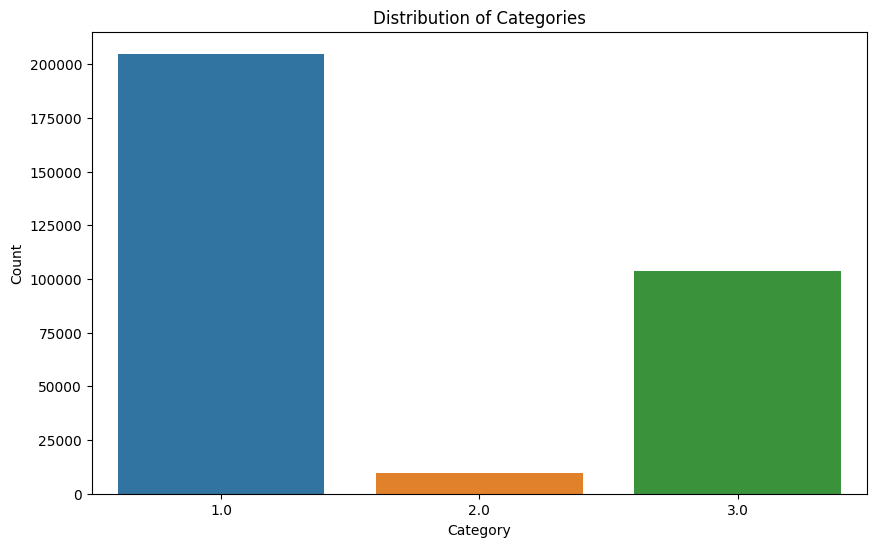

In [3]:
# Exploratory Data Analysis and Feature Engineering
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Category')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [4]:
# Text Pre-Processing
X = data['Consumer complaint narrative']
y = data['Category']

In [5]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)